# Multi-layer Perceptron
A Multi-Layer Perceptron (MLP) is a collection of perceptrons connected and organized in layers. The output of one layer of perceptrons is the input of the next layer. Information travels through the network from input to output nodes. There are also special configurations in which the information goes back to previous layers thanks to recurrent connections. Recurrent connections are out of the scope of this laboratory. In this notebook you are going to test how the output of a MLP changes with respect to the changes in its weight connections for different activation functions.

# Loading the packages

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from ipywidgets import interact, widgets
from IPython.display import display

%matplotlib inline

# Definition of some activation functions

Linear
$$output = neta$$

Sigmoid
$$output = \frac {1}{1 + e^{-neta}}$$

Hyperbolic tangent
$$output = \frac {e^{neta} - e^{-neta}}{e^{neta} + e^{-neta}}$$

Gaussian
$$output = e^{-neta^{2}}$$

In [2]:
def linear(neta):
    '''Linear activation function'''
    output = neta
    return output

def sigmoid(neta):
    ''' Sigmoidal activation function'''
    output = 1 / (1 + np.exp(-neta))
    return output

def htan(neta):
    '''Hyperbolic tangent activation function'''
    exp = np.exp(neta)
    m_exp = np.exp(-neta)
    output = (exp - m_exp ) / (exp + m_exp)
    return output

def gaussian(neta):
    '''Gaussian activation function'''
    output = np.exp(-1 * neta * neta)
    return output

activation_functions_dict = {'Linear': linear, 'Sigmoid': sigmoid, 'Hyperbolic tangent': htan, 'Gaussian':gaussian}

## Perceptron

$$output = f\_act(\sum_{i=0}^{1}{(I_{i} * W_{i}) + b})$$

In [3]:
def perceptron(input_values, weights, bias, activation_function):
    '''Computes the output of a perceptron
    :param input_values: inputs to the perceptron
    :param weights: perceptron parameters (multiply inputs)
    :param bias: perceptron parameter (adds to inputs)
    :param activation_function: activation function to apply to the weighted sum of inputs
    :return: perceptron output'''
    neta = np.dot(input_values, weights) + bias
    output = activation_function(neta)
    return output

## Multilayer Perceptron

$$h0 = f\_act(\sum_{i=0}^{1}{(I_{i} * W0_{i}) + b\_0})$$
$$h1 = f\_act(\sum_{i=0}^{1}{(I_{i} * W1_{i}) + b\_1})$$
$$output = f\_act(\sum_{i=0}^{1}{(H_{i} * Wh_{i}) + b\_h})$$

## Functions to plot the MLP output

In [4]:
input_x = np.arange(-1.2, 1.2, 0.1)
input_y = np.arange(-1.2, 1.2, 0.1)

input_x_matrix, input_y_matrix = np.meshgrid(input_x, input_y)
inputs_xy = np.concatenate((input_x_matrix.flatten()[:,np.newaxis], input_y_matrix.flatten()[:,np.newaxis]), axis=1)

def plot_MLP(w_x_0, w_x_1, w_y_0, w_y_1, w_h_0, w_h_1, b_0, b_1, b_h, activation_function_index):
    w_0 = np.array([w_x_0, w_y_0])
    w_1 = np.array([w_x_1, w_y_1])
    w_h = np.array([w_h_0, w_h_1])
    
    activation_function = activation_functions_dict.get(activation_functions_dict.keys()[activation_function_index])
    
    h_0 = perceptron(inputs_xy, w_0, b_0, activation_function)
    h_1 = perceptron(inputs_xy, w_1, b_1, activation_function)
    h = np.array([h_0, h_1]).T
    
    output_values = perceptron(h, w_h, b_h, activation_function)
    output_matrix = np.reshape(output_values, input_x_matrix.shape)
    
    pl.figure(figsize=(8,6))
    pl.imshow(np.flipud(output_matrix), interpolation='None', extent=(-1.2,1.2,-1.2,1.2), vmin=-1.0, vmax=1.0)
    pl.xlabel('x')
    pl.ylabel('y')
    pl.colorbar()
    pl.grid()

In [5]:
def create_slider(name):
    return widgets.FloatSlider(
        value=0.5,
        min=-2.0,
        max=2.0,
        step=0.01,
        description=name,
    )

def create_controls():
    controls = {name:create_slider(name) for name in ['w_x_0', 'w_x_1', 'w_y_0', 'w_y_1', 'w_h_0', 'w_h_1', 'b_0', 'b_1', 'b_h']}

    controls['activation_function_index'] = widgets.Dropdown(
        options={activation_functions_dict.keys()[i]:i for i in range(len(activation_functions_dict))},
        value=1,
        description='Activation function:',
    )
    return controls

## Plot the MLP output

HBox(children=(FloatSlider(value=0.5, description=u'w_x_0', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'w_y_0', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'b_0', max=2.0, min=-2.0, step=0.01)))

HBox(children=(FloatSlider(value=0.5, description=u'w_x_1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'w_y_1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'b_1', max=2.0, min=-2.0, step=0.01)))

HBox(children=(FloatSlider(value=0.5, description=u'w_h_0', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'w_h_1', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.5, description=u'b_h', max=2.0, min=-2.0, step=0.01)))

Dropdown(description=u'Activation function:', index=1, options={'Sigmoid': 3, 'Hyperbolic tangent': 1, 'Gaussian': 0, 'Linear': 2}, value=1)

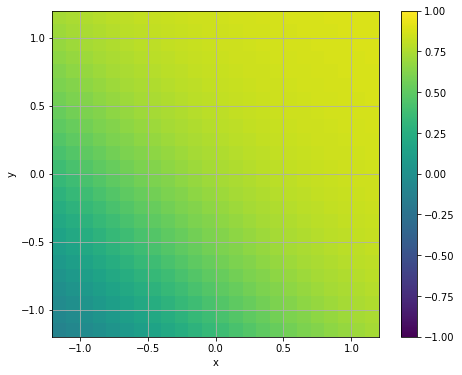

In [6]:
controls = create_controls()
p0 = widgets.HBox(children=[controls['w_x_0'], controls['w_y_0'], controls['b_0']])
p1 = widgets.HBox(children=[controls['w_x_1'], controls['w_y_1'], controls['b_1']])
h0 = widgets.HBox(children=[controls['w_h_0'], controls['w_h_1'], controls['b_h']])

widgets.interactive(plot_MLP, **controls);
display(p0)
display(p1)
display(h0)
display(controls['activation_function_index'])
plot_MLP(**{key:controls[key].value for key in controls.keys()})

## Exercise

- Use the sliders to change the values of the connection weights and biases, and observe the resulting changes in the MLP output
- Change the activation function and observe the changes